In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Exploration

In [2]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [4]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
                                                            data = {"area_income" : df['Avg. Area Income'] , "age" : df['Avg. Area House Age'] , "room" : df['Avg. Area Number of Rooms'] , "bedroom" : df['Avg. Area Number of Bedrooms'] , 'area_population' : df['Area Population'], "price" : df['Price']  }

In [6]:
df = pd.DataFrame(data)
df.head()

,area_income,age,room,bedroom,area_population,price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


## EDA

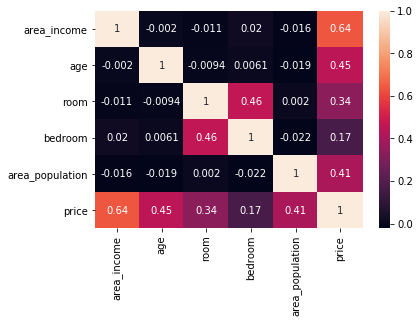

In [7]:
df.corr()
sns.heatmap(df.corr(),annot=True)

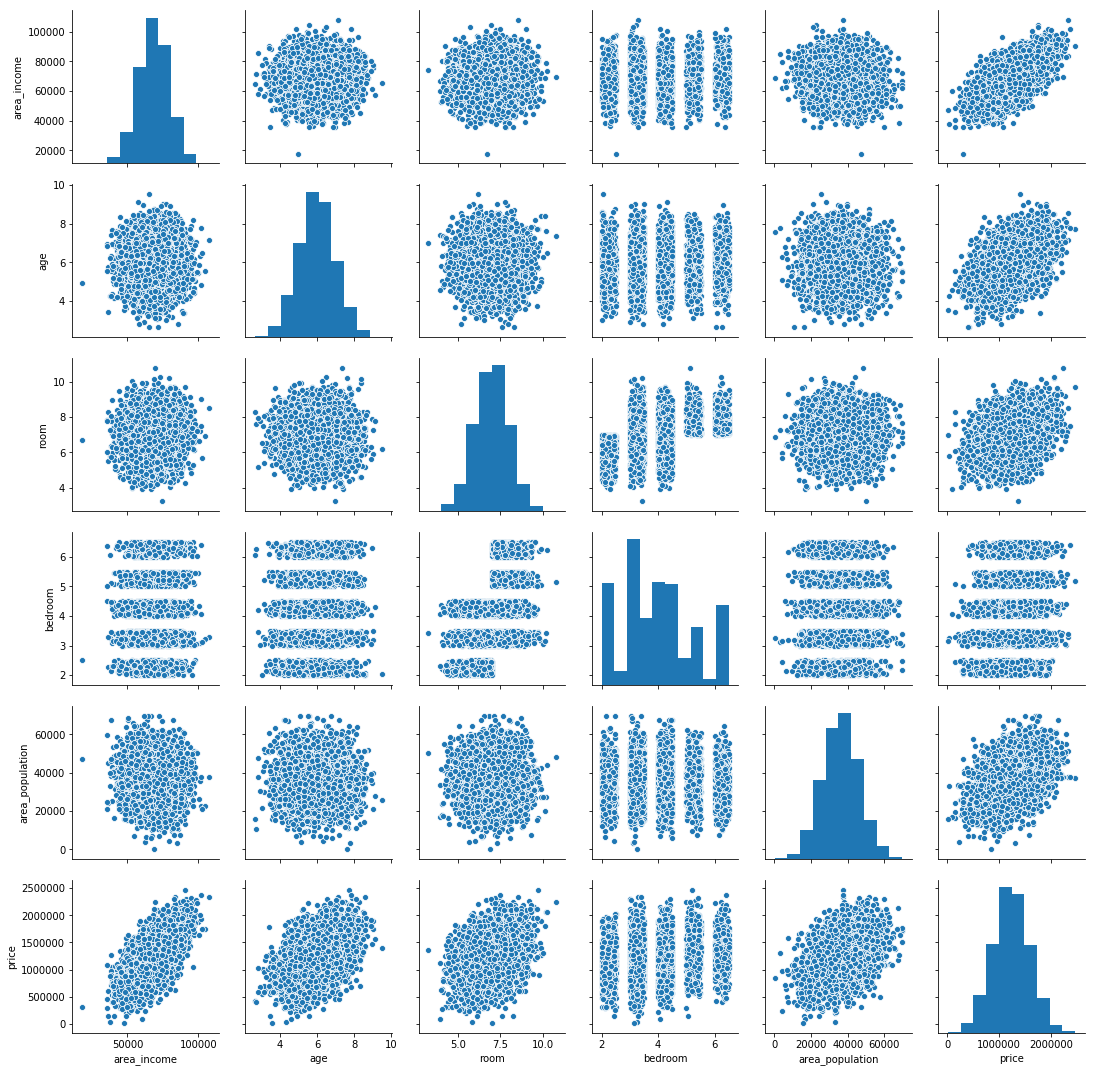

In [8]:
sns.pairplot(df)

## Splitting Data

In [9]:
x = df.drop('price' , axis=1)
y = df ['price']


In [10]:
import sklearn

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.3, random_state=101)

In [13]:
model_ln = LinearRegression()

In [14]:
model_ln.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
coef = model_ln.coef_
coef[0]

21.617634988436894

In [17]:
df_coef = pd.DataFrame(coef , index=x.columns , columns=['Coef'])
df_coef

,Coef
area_income,21.617635
age,165221.119872
room,121405.376596
bedroom,1318.718783
area_population,15.225196


## Evaluate

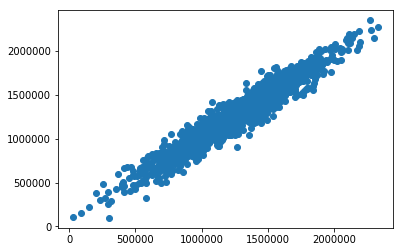

In [25]:
prediction = model_ln.predict(x_test)
plt.scatter(x=y_test , y = prediction)

In [27]:
sns.distplot(data=(y_test - prediction) , bins=50)

TypeError: distplot() got an unexpected keyword argument 'data'